# <center><b>Task-I
---
<h3><center><i>_ Classification technique for
prediction of Graduate Admissions 
from an Indian perspective_

> Name: <b>BHANUPRAKASH</b><br>Batch:<b> Aug'2023</b>
<hr>


### About Dataset:
<h4>Prediction of Graduate Admissions from an Indian perspective.</h4><br>
Let's define each variable :
<li>Serial No.:</li>
   &emsp;&emsp;&emsp;&emsp; A unique identifier assigned to each applicant in the dataset.
<li>GRE Score: </li>
    &emsp;&emsp;&emsp;&emsp;The Graduate Record Examination (GRE) score, which is a standardized test commonly required for admission to graduate schools.
<li>TOEFL Score:</li>
&emsp;&emsp;&emsp;&emsp;The Test of English as a Foreign Language (TOEFL) score, which measures an applicant's English language  proficiency. This score is important for &emsp;&emsp;&emsp;&emsp; non-native English speakers applying to English-speaking universities.
<li>University Rating:</li>
&emsp;&emsp;&emsp;&emsp;The rating or ranking of the university where the applicant wishes to gain admission. It is usually based on factors like faculty reputation, research &emsp;&emsp;&emsp;&emsp;output,and academic facilities.
<li>SOP (Statement of Purpose):</li>
&emsp;&emsp;&emsp;&emsp;This is a critical component of the application process, where applicants provide a written statement outlining their academic and career goals, &emsp;&emsp;&emsp;&emsp; research interests, and reasons for applying to the specific program.
<li>LOR (Letter of Recommendation):</li>
&emsp;&emsp;&emsp;&emsp; Letters written by individuals who can attest to the applicant's academic abilities, character, and potential for success in the graduate program. &emsp;&emsp;&emsp;&emsp;  Typically, universities require two to three letters of recommendation.
<li>CGPA (Cumulative Grade Point Average):</li> 
&emsp;&emsp;&emsp;&emsp;The overall GPA of the applicant throughout their undergraduate studies. This is a measure of their academic performance and success during their &emsp;&emsp;&emsp;&emsp; bachelor's degree.
<li>Research:</li> 
&emsp;&emsp;&emsp;&emsp;A binary variable (0 or 1) indicating whether the applicant has previous research experience. Research experience is often valued by graduate &emsp;&emsp;&emsp;&emsp; programs, especially for applicants interested in research-oriented programs.
<li>Chance of Admit: </li>
&emsp;&emsp;&emsp;&emsp;The estimated probability or chance that the applicant will be admitted to the graduate program. It is calculated based on various factors, such as test &emsp;&emsp;&emsp;&emsp; scores, GPA, statement of purpose, letters of recommendation, and research experience

<b>Statement:</b><br>Use classification technique for prediction of Graduate Admissions  from an Indian perspective.<br>

Dataset link:https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

### Importing required libraries


In [119]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt

# ML libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler


import time
import warnings
warnings.filterwarnings("ignore")

### i) Exploratory Data Analysis

In [57]:
# load dataset
admit=pd.read_csv("C:/Users/Bhanu/OneDrive/Desktop/Internsavvy/Admission_Predict_Ver1.1.csv")

In [58]:
# Shape of dataset
admit.shape

(500, 9)

In [59]:
#Length of dataset
len(admit)

500

In [60]:
# columns of dataframe
admit.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [61]:
# head of dataframe
admit.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [62]:
# Tail of dataframe
admit.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [63]:
#information about dataframe
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [64]:
admit.columns=admit.columns.str.replace(" ","")
admit.columns

Index(['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceofAdmit'],
      dtype='object')

In [65]:
# choosing int columns
int_col=admit.select_dtypes(include=["int64"]).columns.tolist()
int_col

['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'Research']

In [66]:
# choosing float columns
float_col=admit.select_dtypes(include=["float64"]).columns.tolist()
float_col

['SOP', 'LOR', 'CGPA', 'ChanceofAdmit']

In [67]:
# unique datatypes
admit.dtypes.value_counts()

int64      5
float64    4
dtype: int64

In [68]:
#Unique values in dataframe
admit.nunique().sort_values(ascending=False)

SerialNo.           500
CGPA                184
ChanceofAdmit        61
GREScore             49
TOEFLScore           29
SOP                   9
LOR                   9
UniversityRating      5
Research              2
dtype: int64

In [69]:
# we don't have null values identified in info().Lets look again..
admit.isnull().sum()

SerialNo.           0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceofAdmit       0
dtype: int64

In [70]:
# Descriptive Statistics
admit.describe()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [71]:
#Removing unwanted columns
new_admit=admit.drop("SerialNo.",axis=1)
new_admit

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


Text(0, 0.5, 'Count')

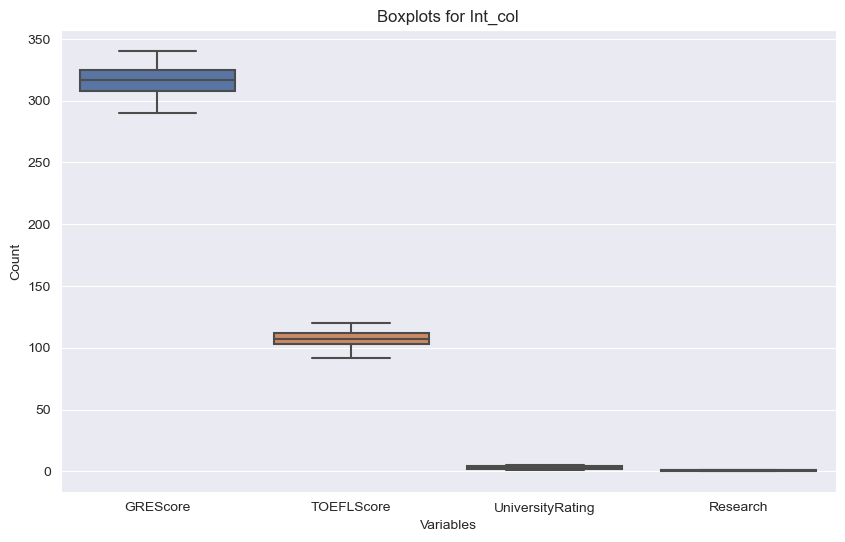

In [72]:
# lets check for outliers in int_col
sb.set({"figure.figsize":(10,6)})
pt.title("Boxplots for Int_col")
sb.boxplot(new_admit[['GREScore', 'TOEFLScore', 'UniversityRating', 'Research']])
pt.xlabel("Variables")
pt.ylabel("Count")

we see that there are no outliers in int columns

Text(0, 0.5, 'Count')

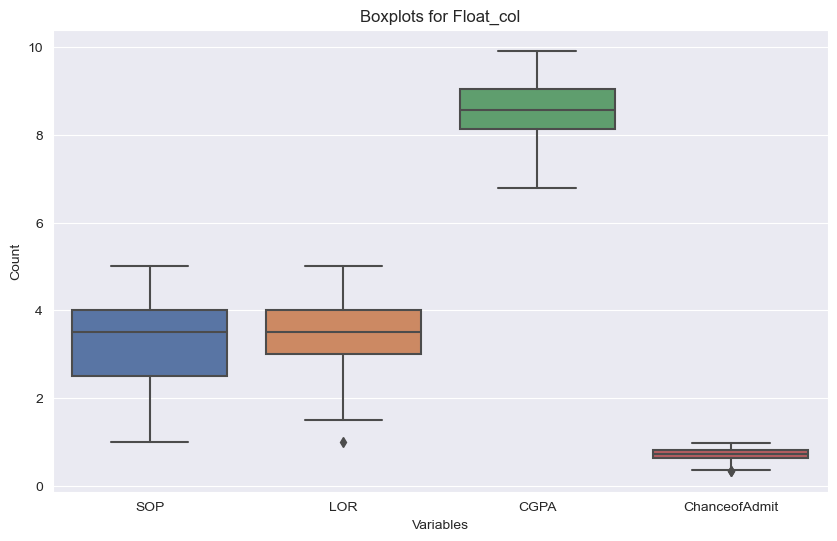

In [73]:
# lets check for outliers in float_col
sb.set({"figure.figsize":(10,6)})
pt.title("Boxplots for Float_col")
sb.boxplot(new_admit[['SOP', 'LOR', 'CGPA', 'ChanceofAdmit']])
pt.xlabel("Variables")
pt.ylabel("Count")

we see that there are few outliers in LOR and Chance of Admit and that may be acceptable.

Text(0, 0.5, 'Count')

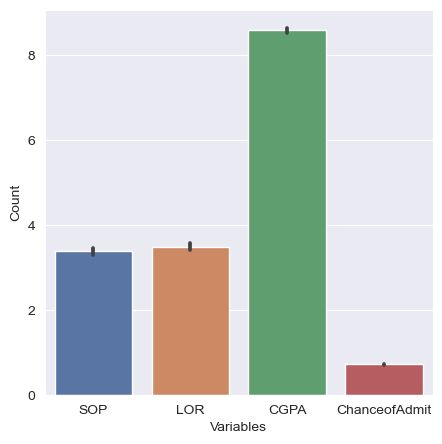

In [74]:
#plotting unique values 
sb.set({"figure.figsize":(5,5)})
sb.barplot(new_admit[['SOP', 'LOR', 'CGPA', 'ChanceofAdmit']])
pt.xlabel("Variables")
pt.ylabel("Count")

### ii) Data Preprocessing 

In [ ]:
#z## ii) Data Preprocessing 

<h5>Our aim is to find whether the student got admitted or not admitted.</h5>
&emsp; In this dataset, the "Chance of Admit" variable is a continuous numerical value representing the probability of admission, ranging between 0 and 1. &emsp; However, to apply classification algorithms, we need to convert this continuous variable into discrete classes.

In [75]:
# Lets change the values in the Admit column to binary. Where 0 indicates "Not Admitted", 1 indicates "Admitted". 
new_admit["ChanceofAdmit"]=np.where(new_admit["ChanceofAdmit"]>0.5,1,0)
new_admit["ChanceofAdmit"].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: ChanceofAdmit, dtype: int32

In [76]:
#lets check the dataframe by adding original values

dummy=new_admit.assign(Original_admit=admit["ChanceofAdmit"])
dummy.head(10)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,Original_admit
0,337,118,4,4.5,4.5,9.65,1,1,0.92
1,324,107,4,4.0,4.5,8.87,1,1,0.76
2,316,104,3,3.0,3.5,8.00,1,1,0.72
3,322,110,3,3.5,2.5,8.67,1,1,0.80
4,314,103,2,2.0,3.0,8.21,0,1,0.65
5,330,115,5,4.5,3.0,9.34,1,1,0.90
6,321,109,3,3.0,4.0,8.20,1,1,0.75
7,308,101,2,3.0,4.0,7.90,0,1,0.68
8,302,102,1,2.0,1.5,8.00,0,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0,0.45


Now the entire data is in numerical format.Lets build our models.

In [77]:
# Lets make response and prediction sets
x=new_admit.drop("ChanceofAdmit",axis=1)
y=new_admit["ChanceofAdmit"]

In [78]:
x.head(3)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1


In [79]:
y.head(3)

0    1
1    1
2    1
Name: ChanceofAdmit, dtype: int32

In [80]:
# Lets have training and testing data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=49)

In [81]:
xtrain.head(5)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
184,316,106,2,2.5,4.0,8.32,0
340,312,107,3,3.0,3.0,8.46,1
21,325,114,4,3.0,2.0,8.40,0
207,310,102,3,3.5,4.0,8.02,1
489,302,110,3,4.0,4.5,8.50,0


In [82]:
xtest.head(5)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
339,324,107,5,3.5,4.0,8.66,1
371,324,110,3,3.5,3.0,9.22,1
455,305,102,2,1.5,2.5,7.64,0
239,299,100,1,1.5,2.0,7.89,0
85,319,103,4,4.5,3.5,8.66,0


In [83]:
ytrain.head(5)

184    1
340    1
21     1
207    1
489    1
Name: ChanceofAdmit, dtype: int32

In [84]:
ytest.head(5)

339    1
371    1
455    1
239    1
85     1
Name: ChanceofAdmit, dtype: int32

In [85]:
#preprocessing numeric data using standardization
scaler=StandardScaler()
xtrain_scale=scaler.fit_transform(xtrain)
xtest_scale=scaler.transform(xtest)

Lets model the data

### iii)  Model Building & Evaluation

In [86]:
# KNN Algo..
knn=KNeighborsClassifier(n_neighbors=5)

start_knn=time.time()
knn.fit(xtrain_scale,ytrain)
end_knn=time.time()

ytest_pred=knn.predict(xtest_scale)
acc_knn=accuracy_score(ytest,ytest_pred)*100

train_score_knn=knn.score(xtrain_scale,ytrain)*100

print(knn)
print("Train Accuracy :{:.5f} ".format(train_score_knn))
print("Test Accuracy :{:.5f}".format(acc_knn))
print("Training Time : {:.2f} seconds.".format(end_knn-start_knn))

KNeighborsClassifier()
Train Accuracy :95.14286 
Test Accuracy :92.00000
Training Time : 0.00 seconds.


In [87]:
# DT Algo..
dt=DecisionTreeClassifier()

start_dt=time.time()
dt.fit(xtrain_scale,ytrain)
end_dt=time.time()

ytest_pred1=dt.predict(xtest_scale)
acc_dt=accuracy_score(ytest,ytest_pred1)*100

train_score_dt=dt.score(xtrain_scale,ytrain)*100


print(dt)
print("Train Accuracy :{:.5f}".format(train_score_dt))
print("Test Accuracy :{:.5f}".format(acc_dt))
print("Training Time : {:.2f} seconds.".format(end_dt-start_dt))


DecisionTreeClassifier()
Train Accuracy :100.00000
Test Accuracy :91.33333
Training Time : 0.00 seconds.


In [88]:
# NB Algo..
nb=GaussianNB()

start_nb=time.time()
nb.fit(xtrain_scale,ytrain)
end_nb=time.time()

ytest_pred2=nb.predict(xtest_scale)
acc_nb=accuracy_score(ytest,ytest_pred2)*100

train_score_nb=nb.score(xtrain_scale,ytrain)*100

print(nb)
print("Train Accuracy :{:.5f}".format(train_score_nb))
print("Test Accuracy :{:.5f}".format(acc_nb))
print("Training Time : {:.2f} seconds.".format(end_nb-start_nb))

GaussianNB()
Train Accuracy :85.42857
Test Accuracy :86.66667
Training Time : 0.00 seconds.


In [89]:
# Logistic Algo..
log=LogisticRegression()

start_log=time.time()
log.fit(xtrain_scale,ytrain)
end_log=time.time()

ytest_pred3=log.predict(xtest_scale)
acc_log=accuracy_score(ytest,ytest_pred3)*100

train_score_log=log.score(xtrain_scale,ytrain)*100

print(log)
print("Train Accuracy :{:.5f}".format(train_score_log))
print("Test Accuracy :{:.5f}".format(acc_log))
print("Training Time : {:.2f} seconds.".format(end_log-start_log))

LogisticRegression()
Train Accuracy :94.85714
Test Accuracy :94.00000
Training Time : 0.00 seconds.


In [90]:
# SVC Algo..
sv=SVC()

start_sv=time.time()
sv.fit(xtrain_scale,ytrain)
end_sv=time.time()

ytest_pred4=sv.predict(xtest_scale)
acc_sv=accuracy_score(ytest,ytest_pred4)*100

train_score_sv=sv.score(xtrain_scale,ytrain)*100

print(sv)
print("Train Accuracy :{:.5f}".format(train_score_sv))
print("Test Accuracy :{:.5f}".format(acc_sv))
print("Training Time : {:.2f} seconds.".format(end_sv-start_sv))

SVC()
Train Accuracy :94.28571
Test Accuracy :92.00000
Training Time : 0.00 seconds.


In [91]:
# RandomForest Algo..
rf=RandomForestClassifier()

start_rf=time.time()
rf.fit(xtrain_scale,ytrain)
end_rf=time.time()

ytest_pred5=rf.predict(xtest_scale)
acc_rf=accuracy_score(ytest,ytest_pred5)*100

train_score_rf=rf.score(xtrain_scale,ytrain)*100

print(rf)
print("Train Accuracy :{:.5f}".format(train_score_rf))
print("Test Accuracy :{:.5f}".format(acc_rf))
print("Training Time : {:.2f} seconds.".format(end_rf-start_rf))

RandomForestClassifier()
Train Accuracy :100.00000
Test Accuracy :94.00000
Training Time : 0.13 seconds.


In [92]:
# GradientBoosting Algo..
gb=GradientBoostingClassifier()

start_gb=time.time()
gb.fit(xtrain_scale,ytrain)
end_gb=time.time()

ytest_pred6=gb.predict(xtest_scale)
acc_gb=accuracy_score(ytest,ytest_pred6)*100

train_score_gb=gb.score(xtrain_scale,ytrain)*100

print(gb)
print("Train Accuracy :{:.5f}".format(train_score_gb))
print("Test Accuracy :{:.5f}".format(acc_gb))
print("Training Time : {:.2f} seconds.".format(end_gb-start_gb))

GradientBoostingClassifier()
Train Accuracy :99.42857
Test Accuracy :94.66667
Training Time : 0.08 seconds.


In [93]:
model_metrics=[]

model_metrics.append(("Logistic Classifier",train_score_log,acc_log))
model_metrics.append(("DecisionTree Classifier",train_score_dt,acc_dt))
model_metrics.append(("KNeighbour Classifier",train_score_knn,acc_knn))
model_metrics.append(("Random Forest Classifier",train_score_rf,acc_rf))
model_metrics.append(("Support Vector Classifier",train_score_sv,acc_sv))
model_metrics.append(("NaiveBayes Classifier",train_score_nb,acc_nb))
model_metrics.append(("GradientBoosting Classifier",train_score_gb,acc_gb))

metrix=pd.DataFrame(model_metrics,columns=["Model","Train_Accuracy","Test_Accuracy"])
metrix

,Model,Train_Accuracy,Test_Accuracy
0,Logistic Classifier,94.857143,94.000000
1,DecisionTree Classifier,100.000000,91.333333
2,KNeighbour Classifier,95.142857,92.000000
3,Random Forest Classifier,100.000000,94.000000
4,Support Vector Classifier,94.285714,92.000000
5,NaiveBayes Classifier,85.428571,86.666667
6,GradientBoosting Classifier,99.428571,94.666667


In [94]:
BEST_MODEL=metrix.loc[metrix['Train_Accuracy'].idxmax() & metrix['Test_Accuracy'].idxmax()] 
BEST_MODEL

Model             Logistic Classifier
Train_Accuracy              94.857143
Test_Accuracy                    94.0
Name: 0, dtype: object

<h4>~: HyperTuning of Parameters :~

In [138]:
# Tuning Logistic Classifier using GridSearchCV

paras_log={"C":[0.1,1,10],"penalty":["l2"]}
gs_cv=GridSearchCV(LogisticRegression(),paras_log,cv=5)

gs_cv.fit(xtrain_scale,ytrain)
pred_val=gs_cv.predict(xtest_scale)

# Best Parameter
best_par=gs_cv.best_params_

#Best_Score
score=gs_cv.best_score_*100


In [140]:
# Algorithm 
gs_cv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']})

In [143]:
print("For GridSearchCV(), We have ,")
print("-"*40)
print("Best Parameter :",best_par)
print("Best score :",score)
print("-"*40)


For GridSearchCV(), We have ,
----------------------------------------
Best Parameter : {'C': 1, 'penalty': 'l2'}
Best score : 94.0
----------------------------------------


In [145]:
# Classification Report for Tuned ones

report=classification_report(ytest,pred_val)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.95      0.99      0.97       139

    accuracy                           0.94       150
   macro avg       0.85      0.63      0.68       150
weighted avg       0.93      0.94      0.93       150



### Concusion :

From the entire classification analysis, we can interpret that,<br>
> <b>Class:</b> 0 indicates "Not Admitted", 1 indicates "Admitted"

> <b>Precision:</b>  For the "0" class, the precision is 0.75, which means that out of all instances predicted as "Not Admitted". For the "1" class, the precision is 0.95, indicating that out of all instances predicted as "Admitted".

> <b>Recall:</b> The "0" class has a recall of 0.27, meaning that out of all actual "Not Admitted" instances, 27% were correctly predicted by the model. The "1" class has a recall of 0.99, indicating that the model correctly identified 99.0% of the actual "Admitted" instances.

> <b>F1-Score:</b> For the "0" class, the F1-Score is 0.40, while for the "1" class, it's 0.97.

> <b>Support:</b> This column shows the number of actual instances for each class. There were 11 instances of "Not Admitted" and 139 instances of "Admitted."

> <b>Accuracy:</b> The overall accuracy of the model is 0.94, which indicates that the model correctly classified 94% of all instances across both classes.


<i>Finally,we summarize that the model's performance for the given data obtained the best model of accuracy<strong> 94%</strong> for logistic classifier,which provides a comprehensive overview of how well the model is doing in terms of precision, recall, F1-Score, and support for both individual classes and overall metrics.

<center>END